# 10. Matplotlib

Matplotlib is an outstanding graphics library, designed for scientific computing with 
* High-qulity 2D and 3D plot. 
* Output in all the usual formats (PDF, PNG, etc.)
* LaTex integration
* Fine-grained control over all aspects of presentation. 
* Animation, etc. 

## Matplotlib's Split Personality

Matplotlib is unusual in that it offers two different interfaces to plotting.

One is a simple MATLAB-style API (Application Programming Interface) that was written to help MATLAB refugees find a ready home.

The other is a more “Pythonic” object-oriented API.

For reasons described below, we recommend that you use the second API.

But first, let’s discuss the difference.

## The MATLIB-style API

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6) # set default figure size


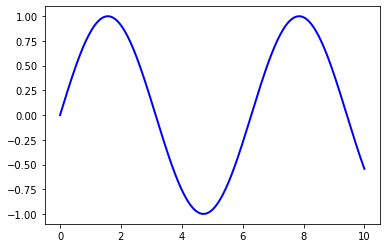

In [3]:
import numpy as np
x = np.linspace(0,10,200)
y = np.sin(x)

plt.plot(x,y,'b-', linewidth = 2)
plt.show()

## The Objected-Oriented API

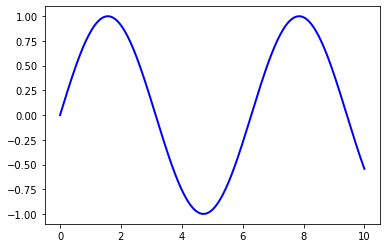

In [4]:
fig , ax = plt.subplots()
ax.plot(x,y,'-b', linewidth = 2)
plt.show()

Here the call `fig, ax = plt.subplots()` return a pair,where 
* `fig` is a `Figure` instance-like a blank canvas.
* `ax` is an `AxwsSubplot` instance-like -- think of a frame for plotting in.

The `plot()` function is actually a method of `ax`.

## Tweaks 

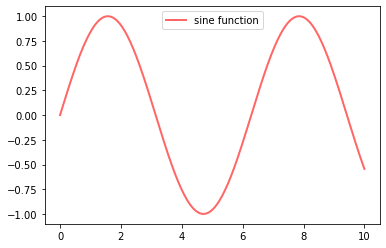

In [8]:
fig , ax = plt.subplots()
ax.plot(x,y, 'r-', linewidth=2, label= 'sine function', alpha = 0.6)
ax.legend(loc = 'upper center')
plt.show()

We've also used `alpha` to make the line slightly transparent - which makes it look smoother. 

The location of the legend can be changed by replacing `ax.legend()` with `ax.legend(loc = 'upper center')`

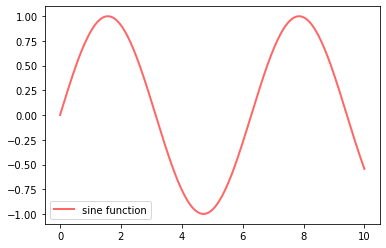

In [9]:
fig, ax = plt.subplots()
ax.plot(x,y,'r-', linewidth = 2, label = 'sine function', alpha = 0.6)
ax.legend()
plt.show()

If everything is properly cnfigured, then adding LaTex is trivial. 

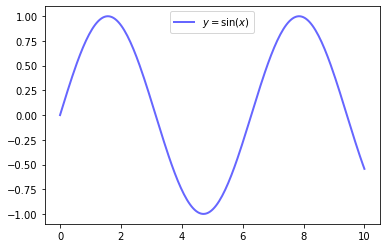

In [11]:
fig, ax = plt.subplots()
ax.plot(x,y,'b-', linewidth = 2, label = '$y=\sin(x)$', alpha = 0.6)
ax.legend(loc = 'upper center')
plt.show()

Controlling the ticks, adding titles and so on is also straightforward.


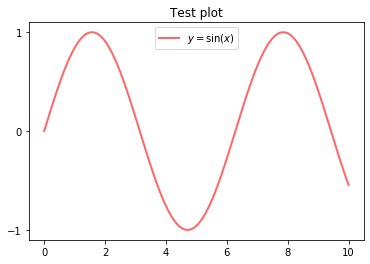

In [13]:
fig, ax = plt.subplots()
ax.plot(x,y, 'r-', linewidth = 2, label = '$y=\sin(x)$', alpha = 0.6)
ax.legend(loc = 'upper center')
ax.set_title('Test plot')
ax.set_yticks([-1,0,1])
plt.show()

## Multiple Plots on one axis

Here is an exmaple that randomly generates three normal densities and adds a label with their mean.

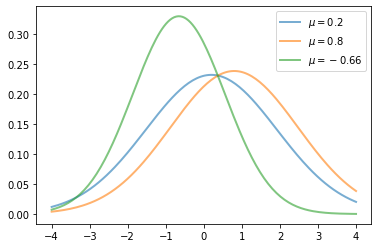

In [22]:
from scipy.stats import norm
from random import uniform

x = np.linspace(-4,4,150)
fig, ax = plt.subplots()

for i in range(3):
    m , s = uniform(-1,1), uniform(1,2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x,y,linewidth = 2, alpha =0.6, label = current_label)
ax.legend(loc ='upper right')
plt.show()
    

## Multiple Subplots

Sometimes we want multiple subplots in one figure.

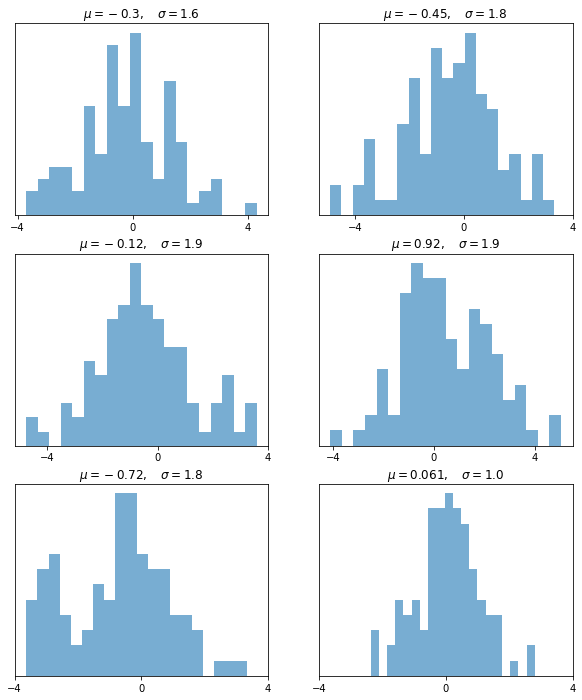

In [24]:
num_rows, num_cols = 3 , 2

fig, axes =plt.subplots(num_rows, num_cols, figsize = (10,12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1,1), uniform(1,2)
        x = norm.rvs(loc=m, scale = s, size = 100)
        axes[i,j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu={m:.2}, \quad \sigma = {s:.2}$'
        axes[i,j].set(title = t, xticks=[-4,0,4], yticks = [])

plt.show()

## 3D Plots

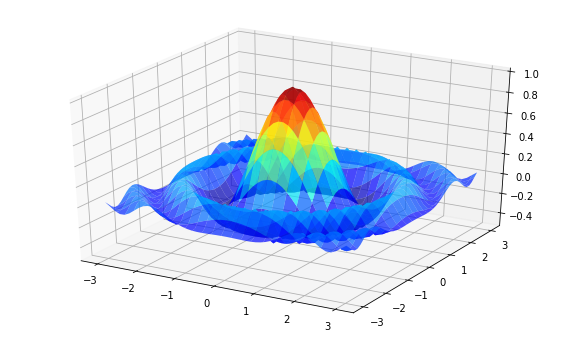

In [28]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

def f(x,y):
    return np.cos(x**2 + y**2) / (1+x**2+y**2)

xgrid = np.linspace(-3,3,50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(
    x,
    y, 
    f(x,y),
    rstride=2, cstride=2,
    cmap= cm.jet, 
    alpha = 0.7, 
    linewidth = 0.25,
)
ax.set_zlim(-0.5,1.0)
plt.show()

## A Customizing Function

The custom subplots function

* calls the standard `plt.subplots` function internally to generate the `fig`, `ax` pair,
* makes the desired customizations to `ax`, and
* passes the `fig, ax` pair back to the calling code.

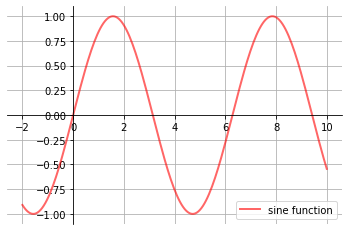

In [33]:
def subplots():
    '''Custom subplots with axes thorugh the orign'''
    fig, ax = plt.subplots()
    
    # Set the axes through the origin.
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
    
    ax.grid()
    return fig, ax

fig, ax = subplots() # call the local version, not plt.subplots()
x = np.linspace(-2,10,200)
y = np.sin(x)
ax.plot(x,y,'r-',label = 'sine function', alpha=0.6, linewidth=2)
ax.legend(loc='lower right')
plt.show()

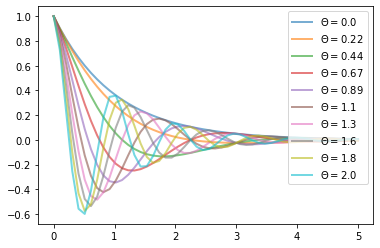

In [40]:
# Excerices 10.1 
interval = np.linspace(0,2,10)
x = np.linspace(0,5,50)
fig, ax =plt.subplots()
for theta in interval:
    y = np.cos(np.pi * theta * x) * np.exp(-1*x)
    ax.plot(x,y, linewidth=2, alpha=0.6, label = f'$ \Theta = {theta:.2}$')
ax.legend(loc='upper right')
plt.show()
    